–û–ø–∏—Å–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏
–¶–µ–ª—å: –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤—ã–∂–∏–≤–∞–Ω–∏—è –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è –∏—Ö –¥–∞–Ω–Ω—ã–µ. –¢–∏–ø –∑–∞–¥–∞—á–∏: –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è (–±–∏–Ω–∞—Ä–Ω–∞—è) ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤—ã–∂–∏–≤–∞–Ω–∏—è (Survived, 1 –∏–ª–∏ 0). –í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ: –•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤, —Ç–∞–∫–∏–µ –∫–∞–∫ –≤–æ–∑—Ä–∞—Å—Ç, –ø–æ–ª, –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –Ω–∞ –±–æ—Ä—Ç—É –∏ —Ç.–¥.

In [37]:
# Titanic Survival Prediction

### Step 0. Problem Description
###Objective**: Predict the survival of Titanic passengers using data on their characteristics.
###type of task**: Binary classification - predicting `Survived` (1 = yes, 0 = no).



### Step 1. Loading the Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

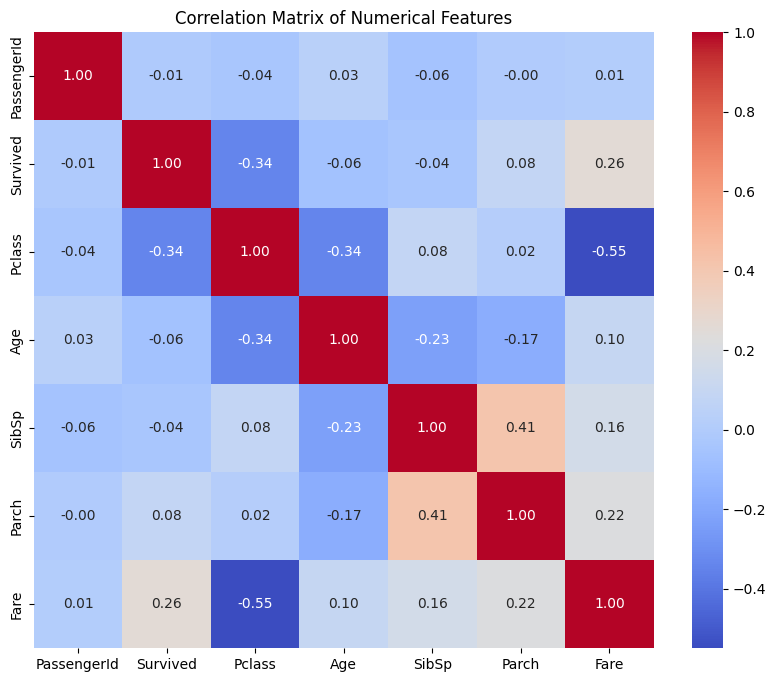

In [35]:
numeric_features = train.select_dtypes(include=[float, int])

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

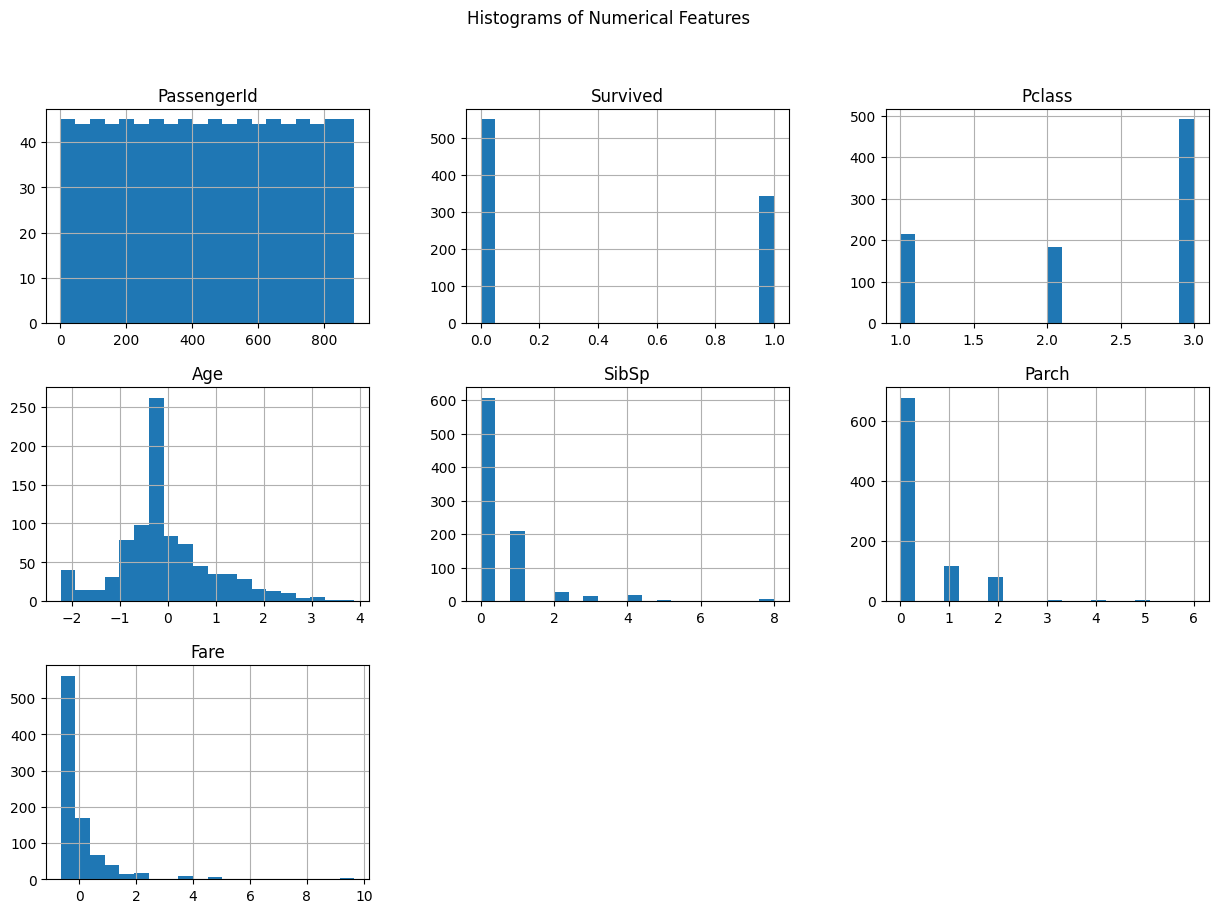

In [32]:


# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
train.hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


In [33]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
statistics = train.describe()
print(statistics)


       PassengerId    Survived      Pclass           Age       SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean    446.000000    0.383838    2.308642  2.272780e-16    0.523008   
std     257.353842    0.486592    0.836071  1.000562e+00    1.102743   
min       1.000000    0.000000    1.000000 -2.224156e+00    0.000000   
25%     223.500000    0.000000    2.000000 -5.657365e-01    0.000000   
50%     446.000000    0.000000    3.000000 -1.046374e-01    0.000000   
75%     668.500000    1.000000    3.000000  4.333115e-01    1.000000   
max     891.000000    1.000000    3.000000  3.891554e+00    8.000000   

            Parch          Fare  
count  891.000000  8.910000e+02  
mean     0.381594  3.987333e-18  
std      0.806057  1.000562e+00  
min      0.000000 -6.484217e-01  
25%      0.000000 -4.891482e-01  
50%      0.000000 -3.573909e-01  
75%      0.000000 -2.424635e-02  
max      6.000000  9.667167e+00  


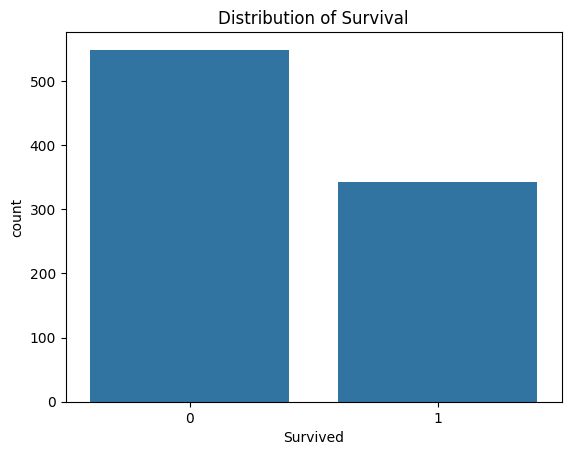

In [34]:
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.show()


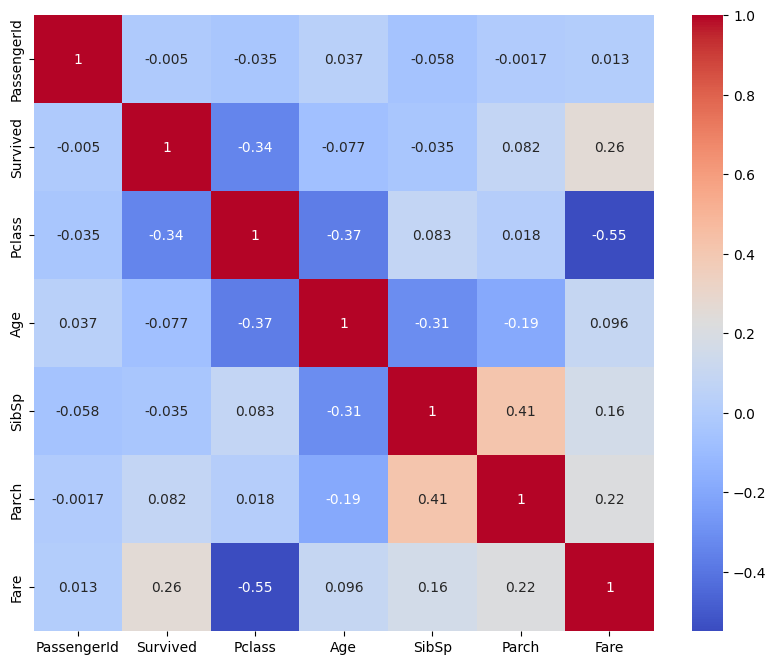

In [22]:
# Step 2. Data Analysis and Basic Statistics
# Select only numerical columns for the correlation matrix
numeric_features = train.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.show()


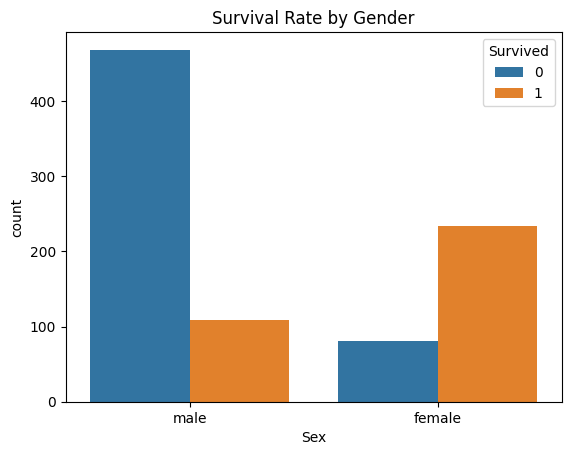

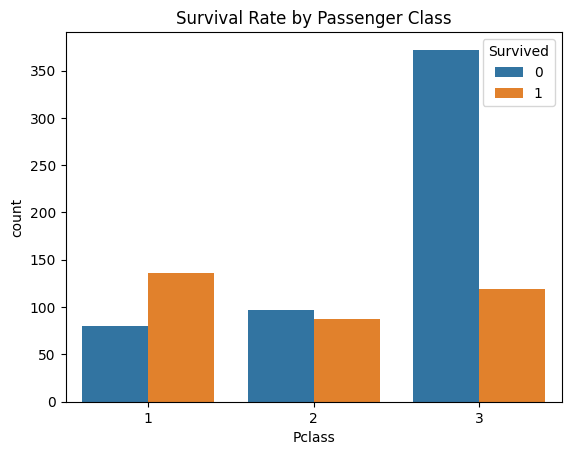

In [38]:
# –í–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–ª–∞ —Å –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å—é
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

# –í–∑–∞–∏–º–æ—Å–≤—è–∑—å –∫–ª–∞—Å—Å–∞ —Å –≤—ã–∂–∏–≤–∞–µ–º–æ—Å—Ç—å—é
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()


–ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Ç–∞–∫–∏–µ –∫–∞–∫ Pclass, Sex, Age, Fare –∏ Embarked) –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –∂–µ–Ω—â–∏–Ω—ã –∏ –ø–∞—Å—Å–∞–∂–∏—Ä—ã –ø–µ—Ä–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏–º–µ–ª–∏ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ —à–∞–Ω—Å–æ–≤ –≤—ã–∂–∏—Ç—å. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ Name –∏ Ticket, –æ–∫–∞–∑–∞–ª–∏—Å—å –º–µ–Ω–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏ –∏ –Ω–µ –±—ã–ª–∏ –≤–∫–ª—é—á–µ–Ω—ã –≤ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–º–æ–≥–ª–æ –ø–æ–Ω—è—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, Pclass –∏ Fare) –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–æ–≥–æ, —á—Ç–æ –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞ –º–æ–≥ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —à–∞–Ω—Å—ã –Ω–∞ —Å–ø–∞—Å–µ–Ω–∏–µ.

In [23]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


C:\Users\mixa\AppData\Local\Temp\ipykernel_4540\1142090327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\mixa\AppData\Local\Temp\ipykernel_4540\1142090327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [24]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [25]:


scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])


In [26]:
from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Step 6. Splitting the Data
# Remove irrelevant or non-numeric columns (e.g., Name, Ticket, Cabin) from X
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train['Survived']

from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

knn = KNeighborsClassifier()
scores = []
for k in range(1, 20):
    knn.n_neighbors = k
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

best_k = np.argmax(scores) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [40]:
train_score = knn.score(X_train, y_train)
val_score = knn.score(X_val, y_val)
print(f"Training Score: {train_score}, Validation Score: {val_score}")


Training Score: 0.7640449438202247, Validation Score: 0.5921787709497207


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_val_score = rf.score(X_val, y_val)
print(f"Random Forest Validation Score: {rf_val_score}")


Random Forest Validation Score: 0.8212290502793296


–ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Ç–∞–∫–∏–µ –∫–∞–∫ Pclass, Sex, Age, Fare –∏ Embarked) –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, –∂–µ–Ω—â–∏–Ω—ã –∏ –ø–∞—Å—Å–∞–∂–∏—Ä—ã –ø–µ—Ä–≤–æ–≥–æ –∫–ª–∞—Å—Å–∞ –∏–º–µ–ª–∏ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ —à–∞–Ω—Å–æ–≤ –≤—ã–∂–∏—Ç—å. –í —Ç–æ –∂–µ –≤—Ä–µ–º—è, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ Name –∏ Ticket, –æ–∫–∞–∑–∞–ª–∏—Å—å –º–µ–Ω–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏ –∏ –Ω–µ –±—ã–ª–∏ –≤–∫–ª—é—á–µ–Ω—ã –≤ –æ–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø–æ–º–æ–≥–ª–æ –ø–æ–Ω—è—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π. –ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, Pclass –∏ Fare) –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ –∏–Ω—Ç—É–∏—Ç–∏–≤–Ω–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–æ–≥–æ, —á—Ç–æ –∫–ª–∞—Å—Å –±–∏–ª–µ—Ç–∞ –º–æ–≥ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—Ç—å –Ω–∞ —à–∞–Ω—Å—ã –Ω–∞ —Å–ø–∞—Å–µ–Ω–∏–µ.

–û—Å–Ω–æ–≤–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –±—ã–ª –≤—ã–±—Ä–∞–Ω –º–µ—Ç–æ–¥ K –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (KNN), –ø–æ—Å–∫–æ–ª—å–∫—É –µ–≥–æ –ø—Ä–æ—Å—Ç–æ –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –∏ –æ–Ω —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –Ω–µ–±–æ–ª—å—à–∏—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö. –û–¥–Ω–∞–∫–æ –µ–≥–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ–º —è–≤–ª—è–µ—Ç—Å—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –≤—ã–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ ùëò, –∫–æ—Ç–æ—Ä—ã–π –º—ã –ø–æ–¥–±–∏—Ä–∞–ª–∏ —Å –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏, —á—Ç–æ–±—ã –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ –∏ —É–ª—É—á—à–∏—Ç—å –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª

–ö—Ä–æ–º–µ —Ç–æ–≥–æ, –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –±—ã–ª–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω—ã –º–æ–¥–µ–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ (Random Forest). –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —á–∞—Å—Ç–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é –±–ª–∞–≥–æ–¥–∞—Ä—è —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –¥–µ—Ä–µ–≤—å–µ–≤.

–ò—Ç–æ–≥–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –æ–∫–∞–∑–∞–ª—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –º–æ–¥–µ–ª—å—é –¥–ª—è –¥–∞–Ω–Ω—ã—Ö Titanic, –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–≤–æ–µ–π —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏, —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∏ —Å–ø—Ä–∞–≤–ª—è—Ç—å—Å—è —Å —Ä–∞–∑–Ω—ã–º–∏ —Ç–∏–ø–∞–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ú–µ—Ç–æ–¥ KNN —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞–ª –ø—Ä–∏–µ–º–ª–µ–º—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–µ–Ω –≤ —Å–∏—Ç—É–∞—Ü–∏—è—Ö, –≥–¥–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –±—ã—Å—Ç—Ä–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∏ —Ä–∞–±–æ—Ç–∞ —Å –Ω–µ–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–∞–Ω–Ω—ã—Ö.